### This Code calculates the dihedral angle distribution between H4-𝛂3 AND H2B𝛂2 helices in the nucleosome core at 2.4 M NaCl

In [1]:
## Import dependencies and Universes
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top1= '/home/augustine/Nucleosome_system/1kx5/1kx5_2.4M/dry_1kx5_2M_OPC_trial3.prmtop'
traj1='/home/augustine/Nucleosome_system/1kx5/1kx5_2.4M/dry_1kx5_2.4M_12us.xtc'
u1 = mda.Universe(top1, traj1)

topology_E76K= '/home/augustine/Nucleosome_system/E76K/E76K_24M/dry_1kx5_2M_E76K_OPC.prmtop'
trajectory_E76K='/home/augustine/Nucleosome_system/E76K/E76K_24M/dry_1KX5_E76K_6000ns.xtc'
u2 = mda.Universe(topology_E76K, trajectory_E76K)

topology_R92T= '/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_2.4M/dry_R92T_24M_OPC.prmtop'
trajectory_R92T='/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_2.4M/dry_R92T_24M_6us.xtc'
u3 = mda.Universe(topology_R92T, trajectory_R92T)
#2.4M Analysis

/home/augustine/miniconda3/envs/mdaenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dihedral angle for wild type

In [4]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection ='resname {} and resid {} and name {}'
a1 = selection.format('ARG', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('ALA', 714, 'CA')
dihed = u1.select_atoms("resid 521 514 739 714 and name CA")
psi = [a1, a2, a3, a4]
psi_angle = sum([u1.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle = psi_angle.dihedral # convert AtomGroup to Dihedral object

psi_list_1kx5_24M = []
for ts in u1.trajectory[12000:25000]:
    psi_list_1kx5_24M.append((ts.frame, psi_angle.value()))

print(psi_list_1kx5_24M)
#Covert Dihedral data in list to array and csv file using numpy and pandas for 1kx5
psi_list_1kx5_24M = np.array(psi_list_1kx5_24M)
DH = pd.DataFrame(psi_list_1kx5_24M)
DH.to_csv("Dihed_1kx5_24M_6us.csv")

[(12000, -21.040506174525618), (12001, -21.606033749245068), (12002, -20.36808302624239), (12003, -19.684779454835542), (12004, -22.403047699906587), (12005, -20.5895559848857), (12006, -20.29264465054263), (12007, -21.732449559072727), (12008, -22.02651200665786), (12009, -20.719924252166336), (12010, -19.013723059991836), (12011, -23.56911617897905), (12012, -22.16811232556812), (12013, -19.65071685204796), (12014, -20.948480888816174), (12015, -20.624651506264446), (12016, -21.32167238163465), (12017, -22.63213806706313), (12018, -20.69721162498269), (12019, -20.08165667968141), (12020, -23.512591704932422), (12021, -20.081312883755892), (12022, -18.394502187446765), (12023, -20.272685387285602), (12024, -19.103118263292657), (12025, -19.68294727873523), (12026, -20.669189627285355), (12027, -20.862319348920686), (12028, -20.786443672547605), (12029, -20.95416192506991), (12030, -19.42000916498347), (12031, -18.503841357081424), (12032, -20.02856480818728), (12033, -19.1081895133732

#### Dihedral angle for H2BE76K

In [5]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection = 'resname {} and resid {} and name {}'
a1 = selection.format('ARG', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('ALA', 714, 'CA')
dihed = u2.select_atoms("resid 521 514 739 714 and name CA")
psi = [a1, a2, a3, a4]
psi_angle2 = sum([u2.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle2 = psi_angle2.dihedral # convert AtomGroup to Dihedral object

psi_list_E76K = []
for ts in u2.trajectory[12000:25000]:
    psi_list_E76K.append((u2.trajectory.time, psi_angle2.value()))

print(psi_list_E76K)
#Covert Dihedral data in list to array and csv file using numpy and pandas for R92T
psi_list_E76K = np.array(psi_list_E76K)
DE = pd.DataFrame(psi_list_E76K)
DE.to_csv("Dihed_E76K_24M_6us.csv")

[(12000.0, -27.679114170234648), (12001.0, -26.055445705643578), (12002.0, -30.05341220030411), (12003.0, -26.715338579381946), (12004.0, -25.513045271721694), (12005.0, -27.721872103034986), (12006.0, -27.24047337097375), (12007.0, -27.270038052772115), (12008.0, -27.14940320314673), (12009.0, -29.328531761963692), (12010.0, -26.963078038160965), (12011.0, -25.82646686240323), (12012.0, -25.084563683952176), (12013.0, -27.872035007208318), (12014.0, -26.20470637937992), (12015.0, -21.094370346881714), (12016.0, -27.684948479606653), (12017.0, -26.31789553312835), (12018.0, -22.829842738335834), (12019.0, -25.339153232839706), (12020.0, -23.26869327400856), (12021.0, -24.85003361383499), (12022.0, -23.114910633291725), (12023.0, -24.862751384282884), (12024.0, -24.379964673766263), (12025.0, -25.768411695554338), (12026.0, -25.865569658673127), (12027.0, -24.859258443182778), (12028.0, -25.840896133321444), (12029.0, -21.46374471157658), (12030.0, -26.44426177337548), (12031.0, -25.198

##### Dihedral angle for H4R92T

In [6]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection = 'resname {} and resid {} and name {}'
a1 = selection.format('THR', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('ALA', 714, 'CA')
dihed = u3.select_atoms("resid 521 514 739 714 and name CA")
psi = [a1, a2, a3, a4]
psi_angle2 = sum([u3.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle2 = psi_angle2.dihedral # convert AtomGroup to Dihedral object

psi_list_R92T = []
for ts in u3.trajectory[12000:25000]:
    psi_list_R92T.append((ts.frame, psi_angle2.value()))

print(psi_list_R92T)
#Covert Dihedral data in list to array and csv file using numpy and pandas for R92T
psi_list_R92T = np.array(psi_list_R92T)
DR = pd.DataFrame(psi_list_R92T)
DR.to_csv("Dihedral_helices/Dihed_R92T_24M_6us.csv")

[(12000, -20.931624960178834), (12001, -21.582636239803776), (12002, -18.977112348792932), (12003, -21.481821708419076), (12004, -21.362116522300667), (12005, -19.45073256655759), (12006, -19.706318308772932), (12007, -22.72493566311351), (12008, -20.31600872759817), (12009, -22.599386376233202), (12010, -20.324878541407852), (12011, -22.20334567980729), (12012, -20.157241734346975), (12013, -20.193072486730376), (12014, -21.791444479329172), (12015, -22.494548264130973), (12016, -18.348917287152595), (12017, -20.507073022742713), (12018, -17.88331793610947), (12019, -21.366258587470025), (12020, -18.200001021471994), (12021, -17.867965509249288), (12022, -15.586235790937478), (12023, -18.50389230818969), (12024, -25.28635805534251), (12025, -18.834810268954755), (12026, -19.880128142684217), (12027, -16.856622465557134), (12028, -16.95494671378056), (12029, -17.011683682184945), (12030, -22.192499426707446), (12031, -22.18153841611633), (12032, -21.875585790361352), (12033, -17.650924

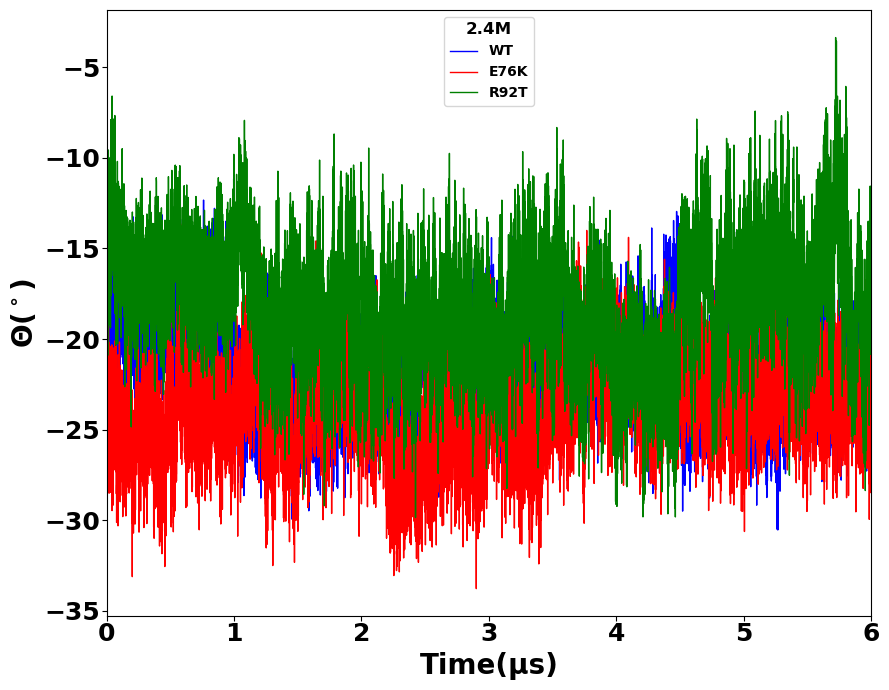

In [6]:
# quick plot of Dihedral Angle against time for all systems at 6 𝝁s
plt.subplots(figsize=(9, 7))
plt.plot(DH[0]/4166.667, DH[1], color='blue', lw=1, label="WT")
plt.plot(DE[0]/4166.667, DE[1], color='r', lw=1, label="E76K")
plt.plot(DR[0]/4166.667, DR[1], color='green', lw=1, label="R92T")
plt.xlim([0, 6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time(\u03BCs)", fontsize = 20.0, fontweight="bold")
plt.ylabel(r"${\Theta}$($^\circ$)", fontsize = 20.0, fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=18, pad=1)
plt.tight_layout()
plt.legend(loc='upper center', fontsize='large', title='2.4M', title_fontsize='large', prop={'weight':'bold'})
plt.show()


In [2]:
### Computing the mean and standard deviation for each system 
# Enter raw data
D1=pd.read_csv('Dihed_1kx5_24M_6us.csv')
D2=pd.read_csv('Dihed_E76K_24M_6us.csv')
D3=pd.read_csv('Dihed_R92T_24M_6us.csv')
# Calculate the average
D1_mean = np.mean(D1['1'])
D2_mean = np.mean(D2['1'])
D3_mean = np.mean(D3['1'])
# Calculate the standard deviation
D1_std = np.std(D1['1'])
D2_std = np.std(D2['1'])
D3_std = np.std(D3['1'])
D1_std
# Create lists for the plot
Nucleosome_Systems = ['1KX5', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [D1_mean, D2_mean, D3_mean]
error = [D1_std, D2_std, D3_std]

In [32]:
### Block averaging of each dihedral angles of each system
import pyblock
D1=pd.read_csv('Dihed_1kx5_24M_6us.csv')
D1=D1['1']
D1=D1.to_numpy()
reblock_data = pyblock.blocking.reblock(D1)
opt = pyblock.blocking.find_optimal_block(len(D1), reblock_data)
print(opt)
print(reblock_data[opt[0]])

print("..........................................................................................................")
D2=pd.read_csv('Dihed_E76K_24M_6us.csv')
D2=D2['1']
D2=D2.to_numpy()
reblock_data = pyblock.blocking.reblock(D2)
for reblock_iter in reblock_data:
    print(reblock_iter)

print("..........................................................................................................")
D3=pd.read_csv('Dihedral_helices/Dihed_R92T_24M_6us.csv')
D3=D3['1']
D3=D3.to_numpy()
reblock_data = pyblock.blocking.reblock(D3)
for reblock_iter in reblock_data:
    print(reblock_iter)

[10]
BlockTuple(block=10, ndata=12, mean=array(-21.61893744), cov=array(0.84066465), std_err=array(0.26467978), std_err_err=array(0.05642992))
..........................................................................................................
BlockTuple(block=0, ndata=13000, mean=array(-23.15622255), cov=array(5.48134036), std_err=array(0.02053391), std_err_err=array(0.00012735))
BlockTuple(block=1, ndata=6500, mean=array(-23.15622255), cov=array(4.16422342), std_err=array(0.02531106), std_err_err=array(0.00022201))
BlockTuple(block=2, ndata=3250, mean=array(-23.15622255), cov=array(3.43446129), std_err=array(0.0325078), std_err_err=array(0.00040327))
BlockTuple(block=3, ndata=1625, mean=array(-23.15622255), cov=array(2.94928227), std_err=array(0.04260215), std_err_err=array(0.00074752))
BlockTuple(block=4, ndata=812, mean=array(-23.15533455), cov=array(2.5948904), std_err=array(0.05653033), std_err_err=array(0.00140364))
BlockTuple(block=5, ndata=406, mean=array(-23.15533455), 

In [5]:
Nucleosome_Systems = ['WT', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [-21.61893744, -23.14823644, -18.27437373]
error = [0.26467978,0.31035581, 0.64026508]

/tmp/ipykernel_53442/3107452831.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize = 15.0)


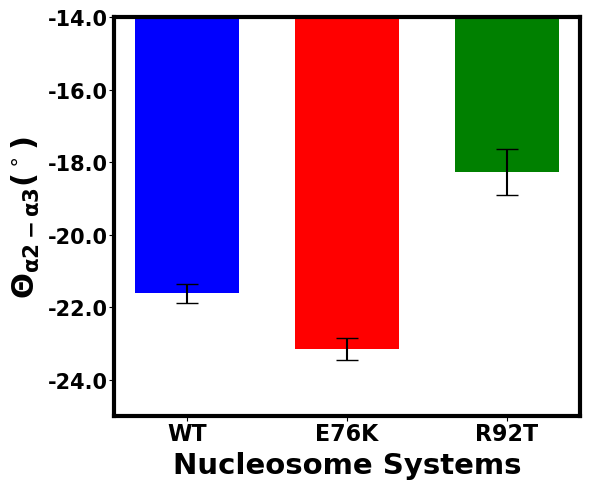

In [30]:
# Bar plot for the average dihedral angles of the systems
fig, ax = plt.subplots(figsize=(6, 5))
plt.ylim(-25,-14)
colors=['blue', 'red', 'green']
ax.bar(x_pos, Dihed, yerr=error, align='center', ecolor='black', color=colors, capsize=8, width=0.65)
ax.set_ylabel(r'$\bf{\Theta}_{\alpha2-\alpha3}$($^\circ$)', fontsize = 22.0, fontweight="bold")
ax.set_xlabel('Nucleosome Systems', fontsize = 21.0, fontweight="bold")
ax.set_xticks(x_pos)
ax.set_xticklabels(Nucleosome_Systems, weight='bold', fontsize = 15.0)
plt.tick_params(labelsize=16, pad=1)
ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize = 15.0)
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# Save the figure and show
plt.tight_layout()
plt.show()

/tmp/ipykernel_53442/264338093.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), weight='bold')


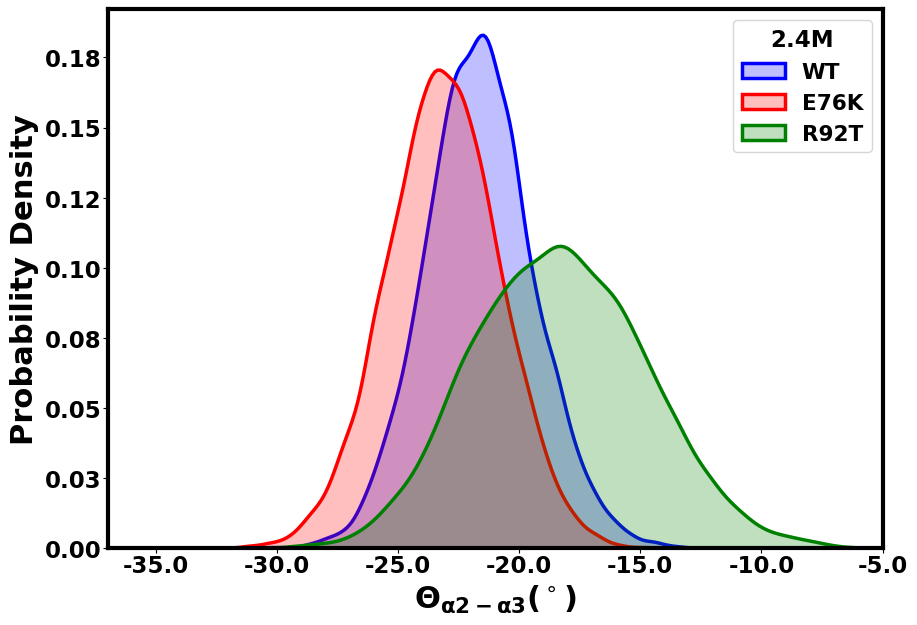

In [36]:
### Probability Distribution of the Dihedral angle of all systems
fig, ax = plt.subplots(figsize=(10, 7))
from matplotlib.ticker import FormatStrFormatter
sns.kdeplot(data=D1, color='blue',fill=True, linewidth=2.5, legend=True, label='WT')
sns.kdeplot(data=D2, color='red',fill=True, linewidth=2.5, legend=True, label='E76K')
sns.kdeplot(data=D3, color='green',fill=True, linewidth=2.5, legend=True, label='R92T')
plt.tick_params(labelsize=16.5, pad=1)
plt.xlim([-37,-5])
#ax.set_yticklabels(ax.get_yticks(), weight='bold')
ax.set_xticklabels(ax.get_xticks(), weight='bold')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xlabel(r'$\bf{\Theta}_{\alpha2-\alpha3}$($^\circ$)', fontsize = 22.0, fontweight="bold")
plt.ylabel('Probability Density', fontsize = 22.0, fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.legend(loc='upper right', title='2.4M', fontsize=15.5, title_fontsize=16.5)
plt.show()